In [38]:
import pandas as pd
import numpy as np
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt #use to visualize dataset vallues
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [39]:
dataset = pd.read_csv("Dataset/UNSW_2018_IoT_Botnet_Full5pc_4.csv", low_memory=False)
dataset

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,3000001,1.528099e+09,e,1,udp,3,192.168.100.147,6226,192.168.100.3,80,...,1.098250,100,100,1.098270,1.098250,1500,1500,1,DDoS,UDP
1,3000002,1.528099e+09,e,1,udp,3,192.168.100.147,6227,192.168.100.3,80,...,1.098250,100,100,1.098270,1.098250,1500,1500,1,DDoS,UDP
2,3000003,1.528099e+09,e,1,udp,3,192.168.100.147,6228,192.168.100.3,80,...,1.098250,100,100,1.098270,1.098250,1500,1500,1,DDoS,UDP
3,3000004,1.528099e+09,e,1,udp,3,192.168.100.147,6229,192.168.100.3,80,...,1.098250,100,100,1.098270,1.098250,1500,1500,1,DDoS,UDP
4,3000005,1.528099e+09,e,1,udp,3,192.168.100.147,6230,192.168.100.3,80,...,1.098250,100,100,1.098270,1.098250,1500,1500,1,DDoS,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668517,3668518,1.529381e+09,e,1,tcp,1,192.168.100.150,35064,192.168.100.3,22,...,9.889330,19,19,455.754000,9.889330,30,30,1,Theft,Keylogging
668518,3668519,1.529381e+09,e,1,tcp,1,192.168.100.150,35066,192.168.100.3,22,...,9.889330,19,19,10453.000000,9.889330,30,30,1,Theft,Keylogging
668519,3668520,1.529381e+09,e,1,tcp,1,192.168.100.150,35070,192.168.100.3,22,...,9.889330,19,19,10.785200,9.889330,441,441,1,Theft,Keylogging
668520,3668521,1.529381e+09,e,1,tcp,1,192.168.100.3,43001,192.168.100.150,4433,...,666667.000000,1,3,666667.000000,22346.400000,2,4,1,Theft,Keylogging


Normal Records : 477
Attack Records : 668045


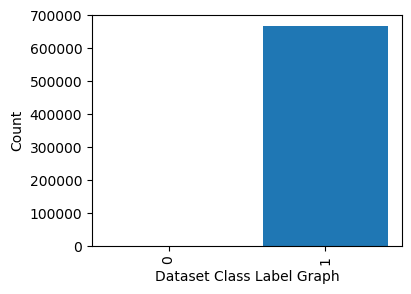

In [40]:
#finding & plotting graph of normal and attacks instances
#visualizing class labels count found in dataset
labels, count = np.unique(dataset['attack'].ravel(), return_counts = True)
print("Normal Records : "+str(count[0]))
print("Attack Records : "+str(count[1]))
height = count
bars = labels
y_pos = np.arange(len(bars))
plt.figure(figsize = (4, 3)) 
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Dataset Class Label Graph")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [41]:
#finding and displaying count of missing or null values
dataset.isnull().sum()

pkSeqID                             0
stime                               0
flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes                              0
rate        

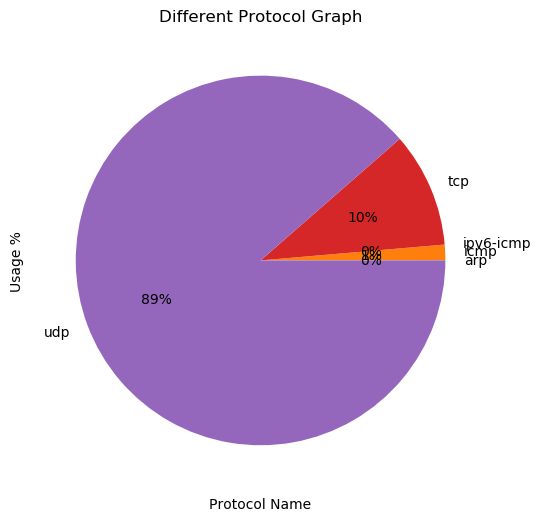

In [46]:
#visualizing product quality as number of Low, high and medium quality
#describe and plotting graph of various Product Current Quality %  found in dataset 
dataset.groupby("proto").size().plot.pie(autopct='%.0f%%', figsize=(6, 6))
plt.title("Different Protocol Graph")
plt.xlabel("Protocol Name")
plt.ylabel("Usage %")
plt.show()

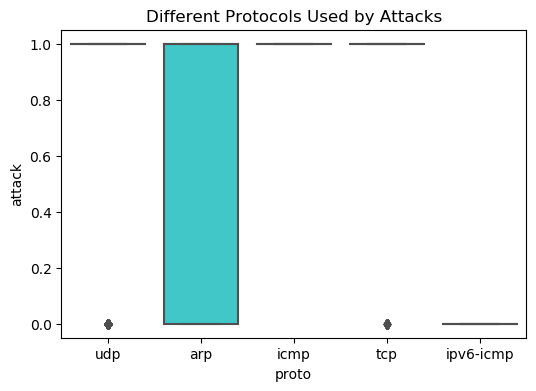

In [54]:
data = dataset[['proto', 'attack']]
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='proto', y='attack', palette='rainbow')
plt.title("Different Protocols Used by Attacks")
plt.show()

In [22]:
#drop irrelevant attributes
dataset.drop(['pkSeqID', 'category', 'subcategory'], axis = 1,inplace=True)
#using label encoder to convert non-numeric values to numeric values
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()
encoder5 = LabelEncoder()
encoder6 = LabelEncoder()
encoder7 = LabelEncoder()
dataset['flgs'] = pd.Series(encoder1.fit_transform(dataset['flgs'].astype(str)))#encode all str columns to numeric
dataset['proto'] = pd.Series(encoder2.fit_transform(dataset['proto'].astype(str)))#encode all str columns to numeric
dataset['saddr'] = pd.Series(encoder3.fit_transform(dataset['saddr'].astype(str)))#encode all str columns to numeric
dataset['sport'] = pd.Series(encoder4.fit_transform(dataset['sport'].astype(str)))#encode all str columns to numeric
dataset['daddr'] = pd.Series(encoder5.fit_transform(dataset['daddr'].astype(str)))#encode all str columns to numeric
dataset['dport'] = pd.Series(encoder6.fit_transform(dataset['dport'].astype(str)))#encode all str columns to numeric
dataset['state'] = pd.Series(encoder7.fit_transform(dataset['state'].astype(str)))#encode all str columns to numeric
dataset

,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,pkts,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
0,1.528099e+09,0,1,4,3,1,58074,16,3629,15,...,1500,1.098250,1.098250,100,100,1.098270,1.098250,1500,1500,1
1,1.528099e+09,0,1,4,3,1,58085,16,3629,15,...,1500,1.098250,1.098250,100,100,1.098270,1.098250,1500,1500,1
2,1.528099e+09,0,1,4,3,1,58096,16,3629,15,...,1500,1.098250,1.098250,100,100,1.098270,1.098250,1500,1500,1
3,1.528099e+09,0,1,4,3,1,58107,16,3629,15,...,1500,1.098250,1.098250,100,100,1.098270,1.098250,1500,1500,1
4,1.528099e+09,0,1,4,3,1,58119,16,3629,15,...,1500,1.098250,1.098250,100,100,1.098270,1.098250,1500,1500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668517,1.529381e+09,0,1,3,1,4,27857,16,1906,6,...,471,9.889330,9.889330,19,19,455.754000,9.889330,30,30,1
668518,1.529381e+09,0,1,3,1,4,27859,16,1906,6,...,471,9.889330,9.889330,19,19,10453.000000,9.889330,30,30,1
668519,1.529381e+09,0,1,3,1,4,27864,16,1906,31,...,471,9.889330,9.889330,19,19,10.785200,9.889330,441,441,1
668520,1.529381e+09,0,1,3,1,6,36677,13,2692,2,...,4,22346.400000,666667.000000,1,3,666667.000000,22346.400000,2,4,1


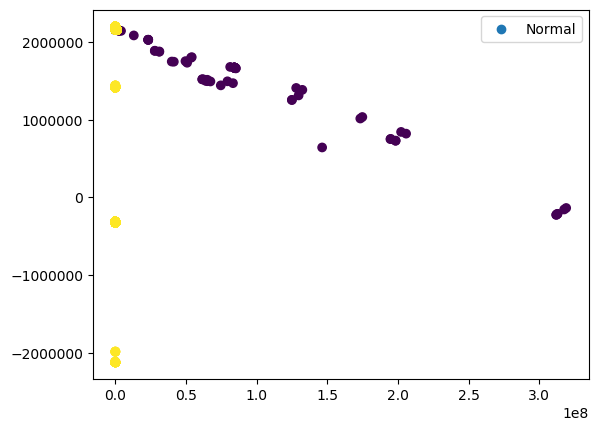

In [37]:
pca = PCA(n_components=2)
temp = dataset.values
X = temp[:,0:temp.shape[1]-1]
Y = temp[:,temp.shape[1]-1]
X = pca.fit_transform(X)
plt.scatter(X[:, 0], X[:, 1], c=Y) 
plt.show() 
    